# Assignment 3

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset is a classic dataset used for clustering tasks. It consists of many samples of wine. Here are the key features and characteristics of the dataset:

##### Features (13 chemical properties):
1. Alcohol: The percentage of alcohol in the wine.
2. Malic acid: A type of acid found in grapes, contributing to wine’s tartness.
3. Ash: The total amount of non-volatile substances left after burning the wine
4. Alcalinity of ash: Measures the alkalinity of the ash component of wine.
5. Magnesium: The amount of magnesium in the wine (measured in mg/L).
6. Total phenols: Represents the total amount of phenolic compounds in wine.
7. Flavanoids: A type of phenolic compound responsible for bitterness and astringency.
8. Nonflavanoid phenols: Phenolic compounds that are not flavonoids.
9. Proanthocyanins: A type of tannin that affects astringency and bitterness.
10. Color intensity: Measures the depth or intensity of the wine’s color. 
11. Hue: The shade of color in the wine (ratio of red to yellow tones).
12. OD280/OD315 of diluted wines: Measures the wine’s absorbance at 280 nm and 315 nm, indicating phenol concentration.
13. Proline: An amino acid found in wine, often associated with aging potential and quality.

In [383]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Wine dataset:

Use scikit-learn to load the Wine dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [384]:
from sklearn.datasets import load_wine
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Display the DataFrame
print(wine_df)

# Your code here...
num_rows = wine_df.shape[0]
print("number of rows:", num_rows)
num_column = wine_df.shape[1]
print("number of column:", num_column)


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (e.g., alcohol, malic acid, ash...).


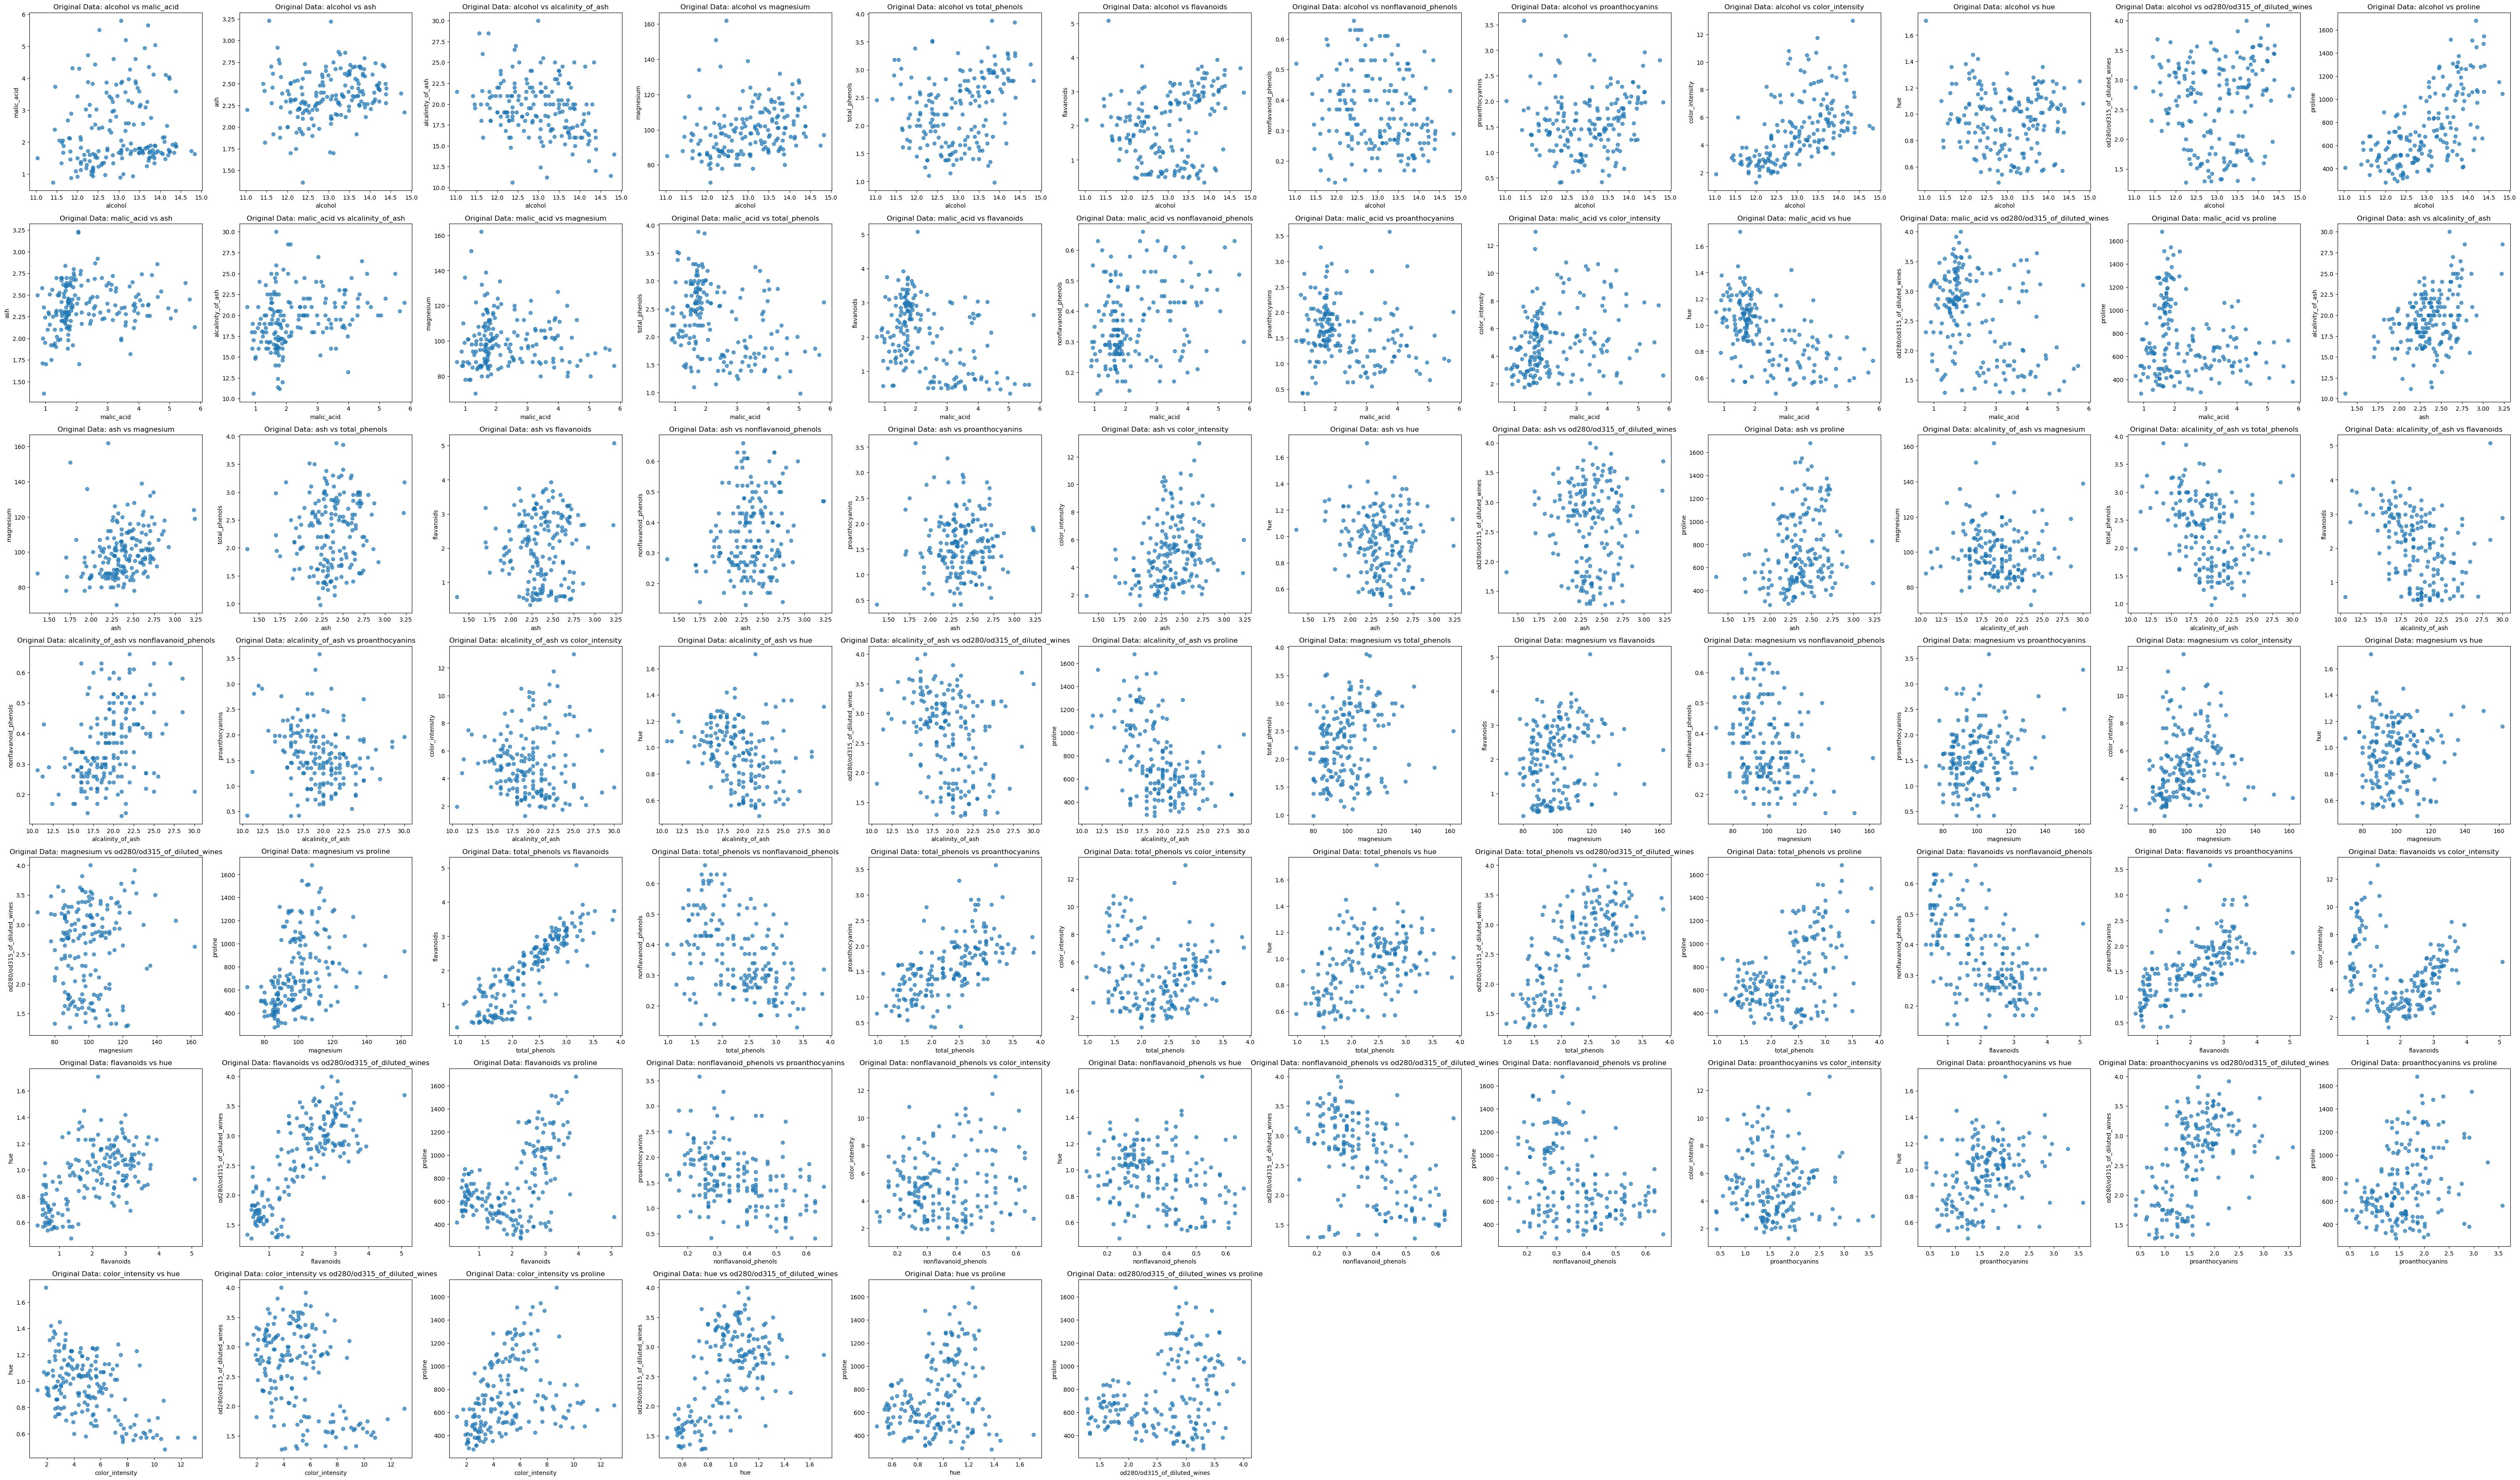

In [385]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = wine_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(wine_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

The different plots & heat maps show that features such as alchol, color intensity, flavnoids, and proline display a good relation between the different wine classes; in conjuction features like alacintiy and magneisum show a different pattern. In the end, these relationships make it easier to classifiy different wine species amongst the classes. 

#### **Question 3:** 
#### Data cleaning

In [386]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(wine_df)

# Create a new DataFrame with scaled features
scaled_wine_df = pd.DataFrame(scaled_features, columns=wine_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_wine_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

 The main goal of K-means is to organize the data into clusters where the points in each cluster are close together, while points in different clusters are far apart. K Means uses distance measures.
 Without scaling larger features dominate cluster , while smaler scale features ignored.
 standardize our data prior to clustering to ensure that all features contribute equally to the distance calculations, preventing any single feature from dominating the results due to its scale.

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Wine dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

In [387]:
kmeans = KMeans(n_clusters=3, random_state=123)

clusters = kmeans.fit(scaled_wine_df)

# Create a copy of the DataFrame for clustering and modification
scaled_wine_df_with_clusters = scaled_wine_df.copy()

# Add cluster labels to the copied DataFrame
scaled_wine_df_with_clusters['Cluster'] = clusters.labels_

# Display the updated DataFrame with the 'Cluster' column
scaled_wine_df_with_clusters



c:\Users\Uma\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  \
0           0.251717  0.362177                      1.847920  1.013009   
1          -0.293321  0.406051                      1.113449  0.965242   
2           0.269020  0.318304                      0.788587  1.395148   
3           1.186068 -0.427544                      1.184071  2.334574   
4          -0.319276  0.362177                      0.449601 -0.037874   
..               ...       ...                           ...       ...   
173         1.142811 -1.392758                     -1.231206 -0.021952   
174         0.969783 -1.129518                     -1.485445  0.009893   
175         2.224236 -1.612125                     -1.485445  0.280575   
176         1.834923 -1.568252                     -1.400699  0.296498   
177         1.791666 -1.524378                     -1.428948 -0.595160   

     Cluster  
0          1  
1          1  
2          1  
3          1  
4          1  
..       ...  
173        2  
174        2  
175        2  
176        2  
177        2  

[178 rows x 14 columns]

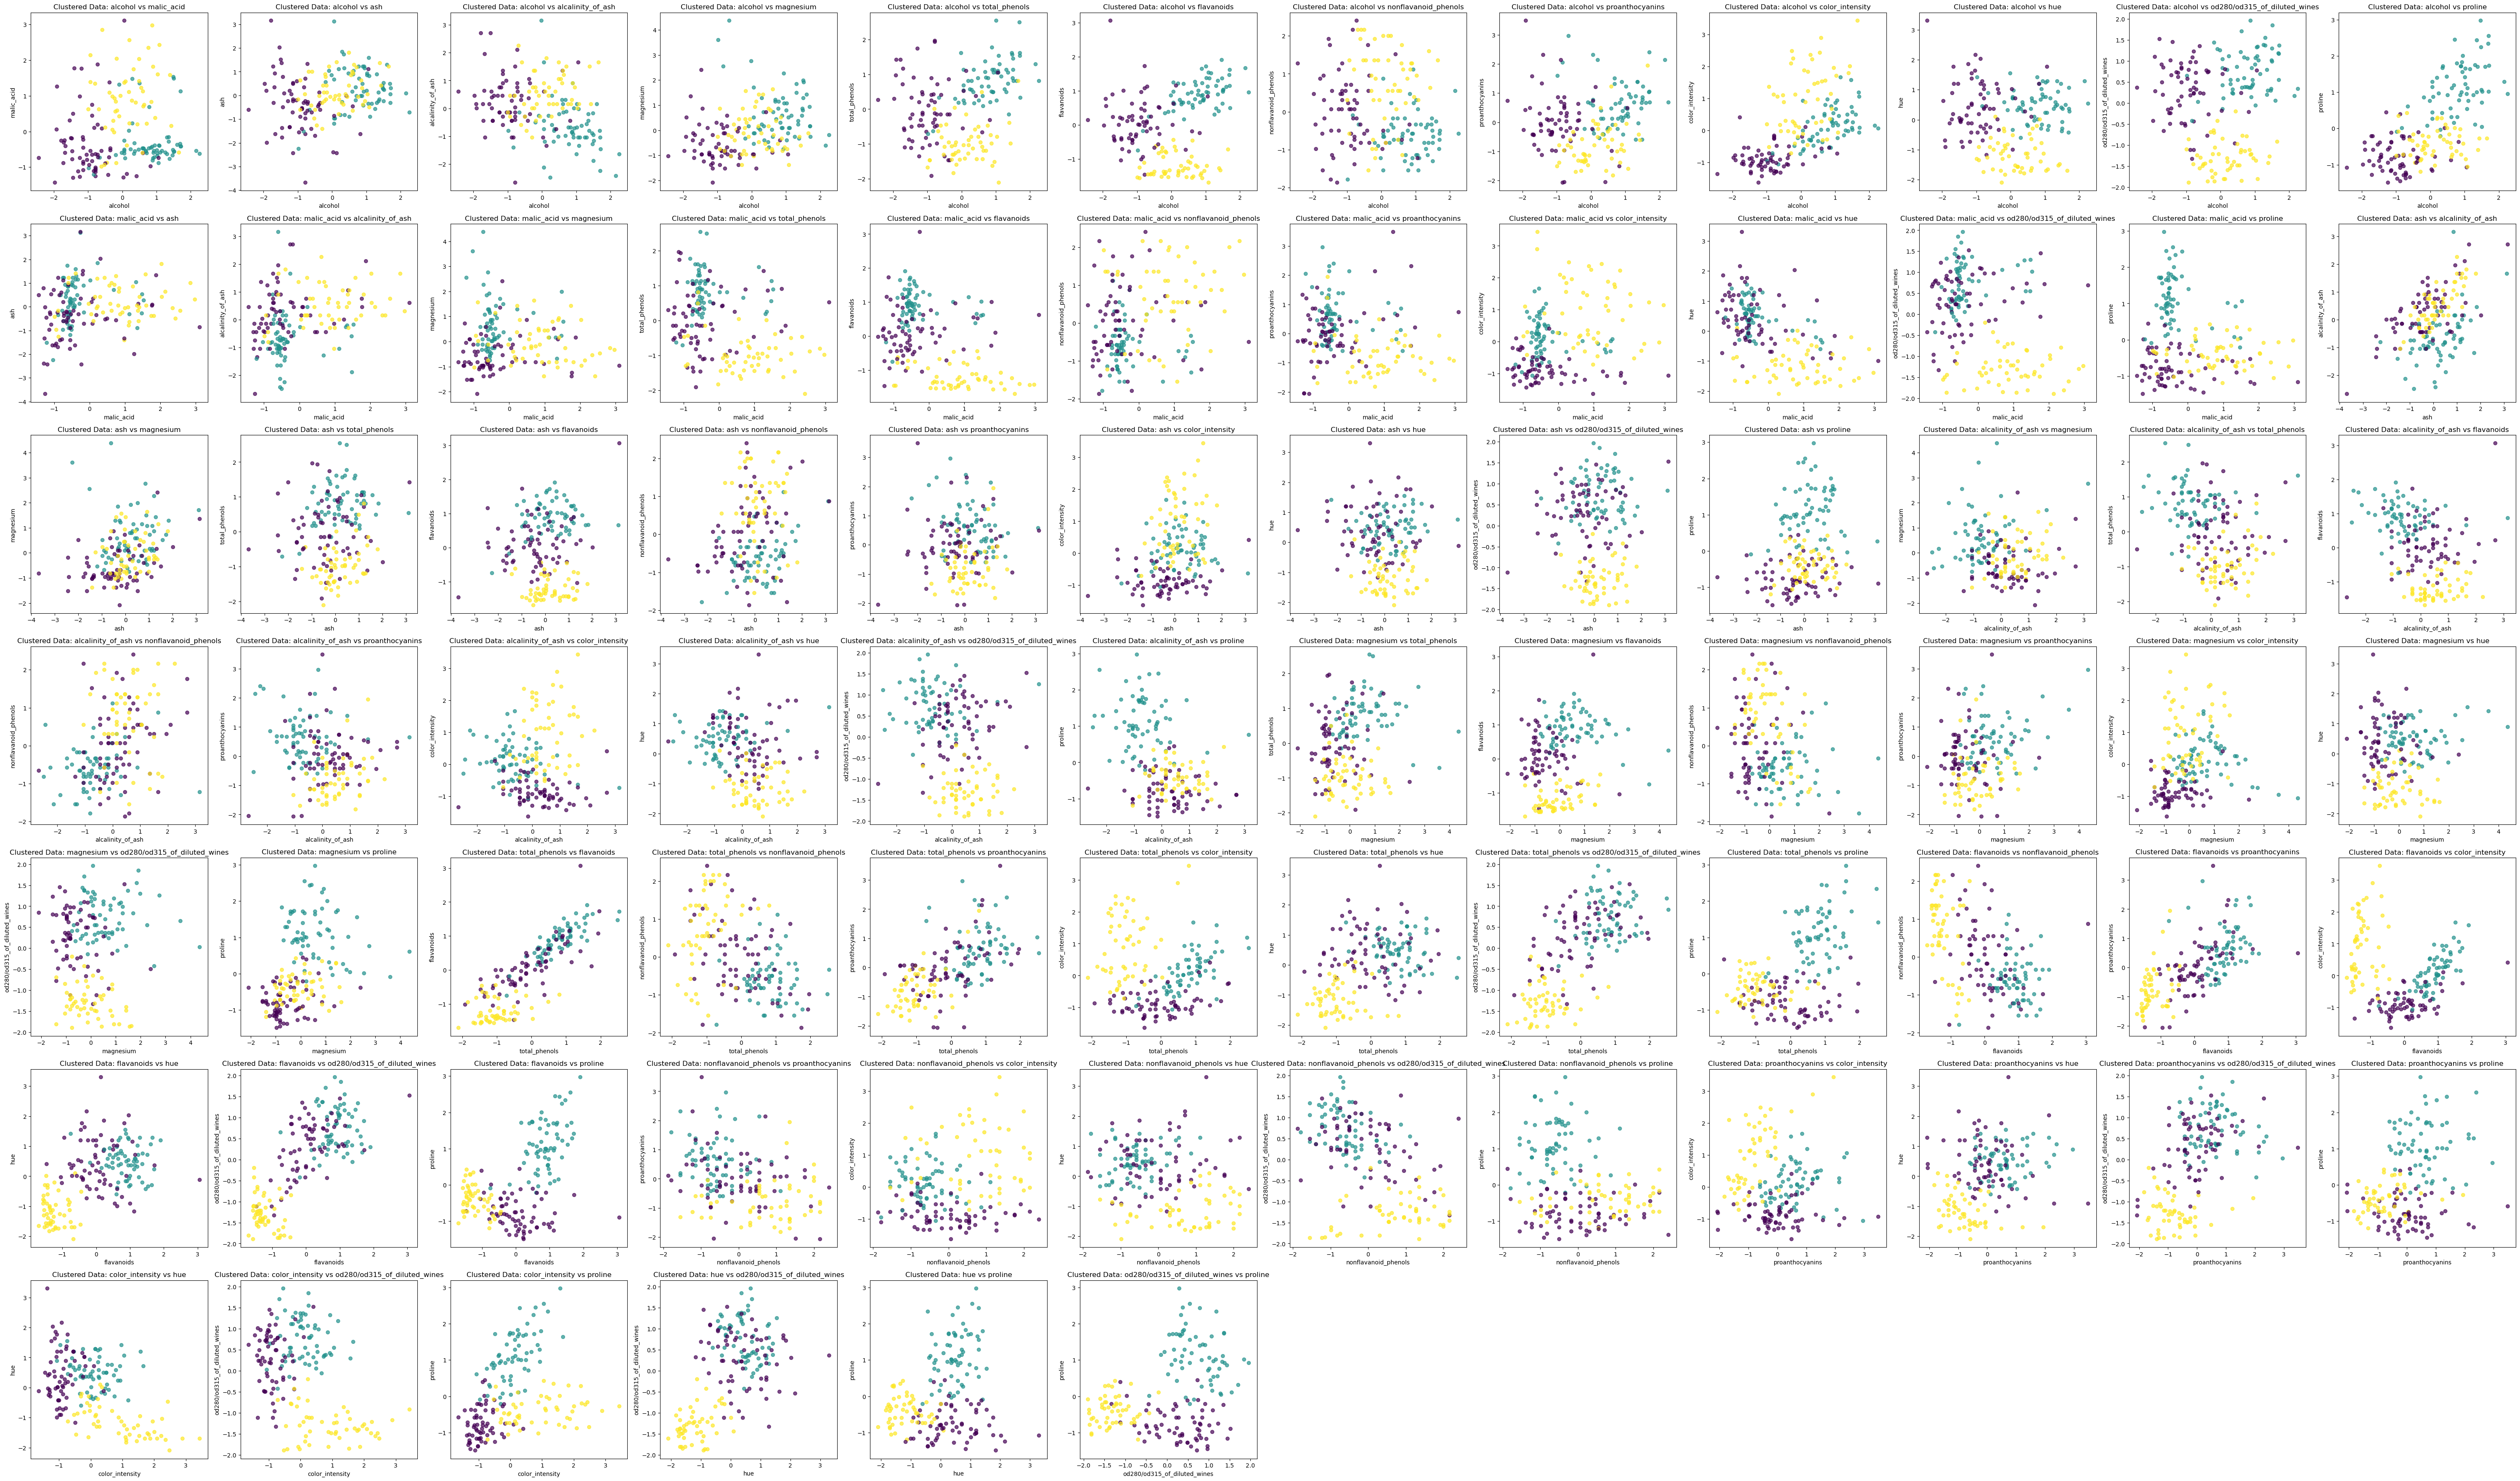

In [388]:


clustered_wine_data = scaled_wine_df_with_clusters

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_wine_data, feature_names, color_labels=clustered_wine_data['Cluster'], title_prefix='Clustered Data: ')

In [389]:
clusters.inertia_

1279.9661527749454

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> Your answer here...The elbow method used to determine the optimal number of cluster. This involves plotting the total WSSD against different values of and looking for an “elbow”—the point where increasing the number of clusters no longer leads to a significant reduction in WSSD.

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of `color intensity`. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [390]:

# The bootstrap method helps us understand how much our sample estimate (like the mean or median) might vary by simulating many new samples from our original data.

In [391]:
wine_df["color_intensity"].mean() # entire Wine_df colour_intensity

np.float64(5.058089882022472)

In [392]:
#np.random.seed(123)
wine_df.sample(n=40)["color_intensity"].mean() #ponit estimate
# 40 sample color_intensity mean 

np.float64(4.968999999999999)

In [393]:
sample_list = []

for i in range(1000):
    sample = wine_df.sample(n=40)
    sample = sample.assign(replicate = i)
    sample_list.append(sample)
samples = pd.concat(sample_list)

In [394]:
samples

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
167    12.82        3.37  2.30               19.5       88.0           1.48   
109    11.61        1.35  2.70               20.0       94.0           2.74   
6      14.39        1.87  2.45               14.6       96.0           2.50   
115    11.03        1.51  2.20               21.5       85.0           2.46   
72     13.49        1.66  2.24               24.0       87.0           1.88   
..       ...         ...   ...                ...        ...            ...   
138    13.49        3.59  2.19               19.5       88.0           1.62   
21     12.93        3.80  2.65               18.6      102.0           2.41   
108    12.22        1.29  1.94               19.0       92.0           2.36   
74     11.96        1.09  2.30               21.0      101.0           3.38   
78     12.33        0.99  1.95               14.8      136.0           1.90   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
167        0.66                  0.40             0.97            10.26  0.72   
109        2.92                  0.29             2.49             2.65  0.96   
6          2.52                  0.30             1.98             5.25  1.02   
115        2.17                  0.52             2.01             1.90  1.71   
72         1.84                  0.27             1.03             3.74  0.98   
..          ...                   ...              ...              ...   ...   
138        0.48                  0.58             0.88             5.70  0.81   
21         2.41                  0.25             1.98             4.50  1.03   
108        2.04                  0.39             2.08             2.70  0.86   
74         2.14                  0.13             1.65             3.21  0.99   
78         1.85                  0.35             2.76             3.40  1.06   

     od280/od315_of_diluted_wines  proline  replicate  
167                          1.75    685.0          0  
109                          3.26    680.0          0  
6                            3.58   1290.0          0  
115                          2.87    407.0          0  
72                           2.78    472.0          0  
..                            ...      ...        ...  
138                          1.82    580.0        999  
21                           3.52    770.0        999  
108                          3.02    312.0        999  
74                           3.13    886.0        999  
78                           2.31    750.0        999  

[40000 rows x 14 columns]

In [395]:
sample_estimates = samples.groupby("replicate")["color_intensity"].mean().reset_index(name="sample_mean")
sample_estimates

replicate  sample_mean
0            0      5.10450
1            1      5.39125
2            2      5.41625
3            3      5.11325
4            4      5.33025
..         ...          ...
995        995      5.23550
996        996      4.94100
997        997      4.40475
998        998      5.41125
999        999      5.38825

[1000 rows x 2 columns]

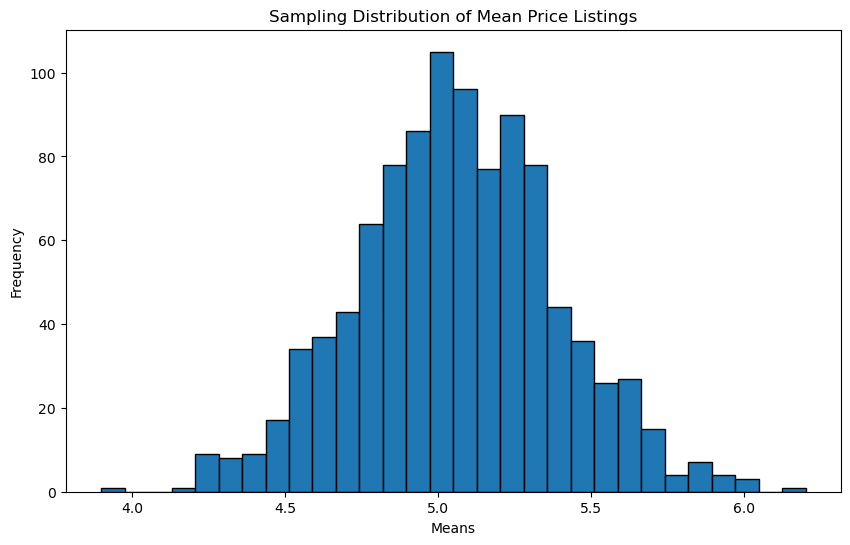

In [396]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_estimates['sample_mean'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Sampling Distribution of Mean Price Listings')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [397]:
#Let's do the a Bootstrap Distribution

In [398]:
# first start by simply taking a sample of 100 observations from our dataset
np.random.seed(123)
one_sample = wine_df.sample(n=100)


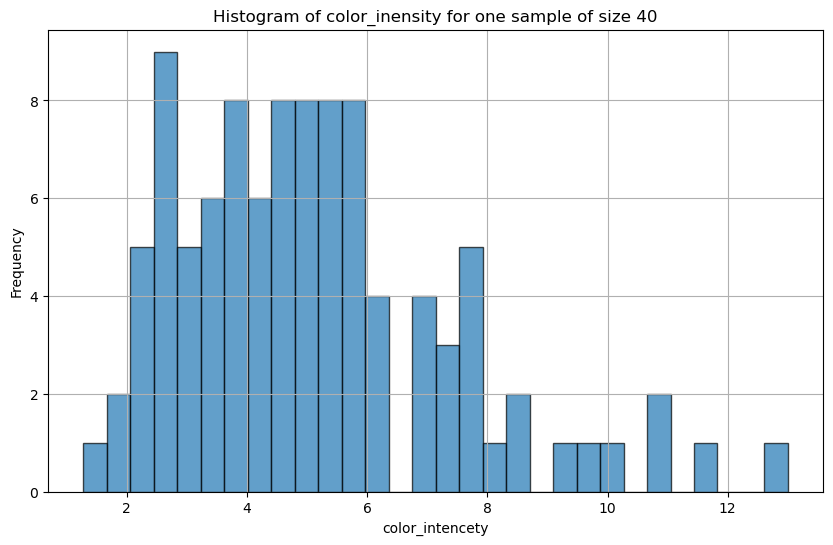

In [399]:
# taking a simple random sample of 100 rows from the wine_df dataset. 
# This is not yet bootstrapping, but it serves as the foundation for what to be doing next.
# Histogram of color_intensity  for one sample of size 40.
plt.figure(figsize=(10, 6))
plt.hist(one_sample['color_intensity'], bins=30, edgecolor='black', alpha=0.7)

# Add titles and labels
plt.title('Histogram of color_inensity for one sample of size 40')
plt.xlabel('color_intencety')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

In [400]:
boot1 = one_sample.sample(frac = 1, replace = True)

In [401]:

bootstrap_samples = []

for i in range(10_000):
    sample = one_sample.sample(frac = 1, replace= True)
    sample = sample.assign(replicate = i)
    bootstrap_samples.append(sample)
boot2000 = pd.concat(bootstrap_samples)

boot_means = boot2000.groupby("replicate")["color_intensity"].mean().reset_index(name="mean_color_intensity")
boot_means



replicate  mean_color_intensity
0             0                4.6820
1             1                5.3850
2             2                5.1121
3             3                5.0449
4             4                5.2462
...         ...                   ...
9995       9995                5.0990
9996       9996                4.9213
9997       9997                5.3079
9998       9998                5.2075
9999       9999                4.6762

[10000 rows x 2 columns]

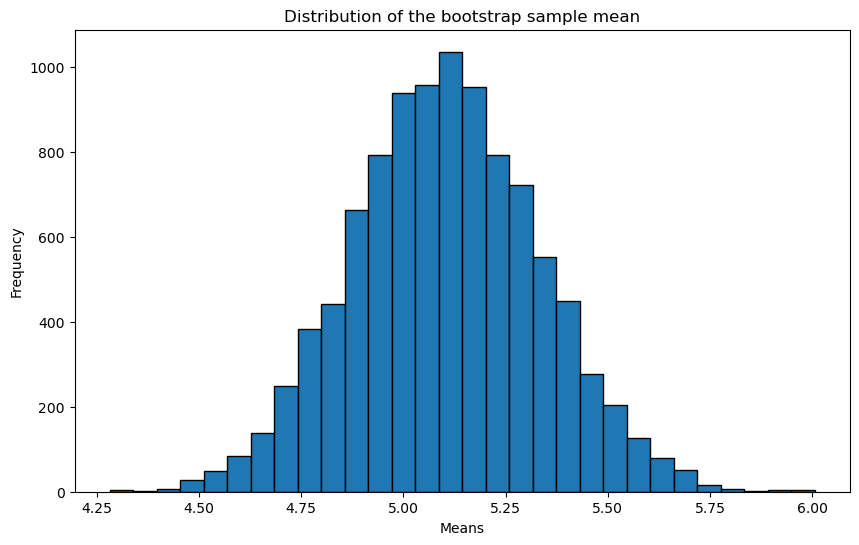

In [402]:
# Plot the histogram of the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(boot_means['mean_color_intensity'], bins=30, edgecolor='black')


# Add titles and labels
plt.title('Distribution of the bootstrap sample mean')
plt.xlabel('Means')
plt.ylabel('Frequency')

# Show the plot
plt.show()



In [403]:
#Calculating the 90% Interval

#Sort the bootstrap sample values.
#Find the value where 5% of the values fall below it (lower bound).
 #ind the value where 95% of the values fall below it (upper bound).


In [404]:
ci_bounds = boot_means["mean_color_intensity"].quantile([0.05,0.95])
ci_bounds

# Display the result
print(f"Mean of Color Intensity: {mean_color_intensity}")
print(f"90% Confidence Interval of Mean Color Intensity: ({lower_bound}, {upper_bound})")

Mean of Color Intensity: 5.058089882022472
90% Confidence Interval of Mean Color Intensity: (4.778817409550562, 5.345019657303371)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

>  Your answer..
Bootstrapping is approximately sample distribution. How much variability in our estimate through our sample distribution.
Bootstrapping stimulates this by resampling with replacement from our dataset many times. Each resampling gives slightly different means. collecting these mean gives a possible sample mean.
we want know the uncertainty around mean of colour _intensity, since we don’t have full population, only data set.



**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Your answer...By using bootstrap resampling, we repeatedly sample (with replacement) from our dataset. Each samples gives slightly different mean. Collecting all means gives us statical distribution data. From this calculate CI. in this wine_df data set , we can say 90% color_intensity true mean values lies in between Mean of Color Intensity: 4.778817409550562, 5.345019657303371

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the color intensity appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> Your answer here...
The bootstrap histogram of sample mean is around 5.06. The 90% confidence interval have an only width about 0.57 (5.35-4.48). narrow width shows estimate mean is stable.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are correctly interpreted to explore relationships between features and species. | Visualizations are not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 09/21/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-7-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
